### For converting latitude and longitude into census identifiable geoid

In [5]:
mini

,Latitude_Defendant_Address,Longitude_Defendant_Address
0,29.622726,-95.647873
1,29.621316,-95.562225
2,29.627645,-95.635597
3,29.525902,-95.531735
4,29.753968,-95.810176
5,29.622726,-95.647873


In [ ]:
mini.columns = ['lat', 'lng']

In [6]:
import pandas as pd
import censusgeocode as cg
from random import uniform
from concurrent.futures import ThreadPoolExecutor
from tqdm.notebook import tqdm

In [7]:
def geocode(row):
    index, lat, lng = row
    try:
        census = cg.coordinates(lng, lat)['2020 Census Blocks'][0]

        data = dict(geoid=census['GEOID'], 
                    state = census['STATE'],
                    county = census['COUNTY'],
                    lat=lat, 
                    lng=lng)

    except Exception as e:
        data = dict(lat=lat, 
                    lng=lng)

    return data

with ThreadPoolExecutor() as tpe:
     data = list(tqdm(tpe.map(geocode, mini.itertuples()), total=len(mini)))
df = pd.DataFrame.from_records(data)

  0%|          | 0/6 [00:00<?, ?it/s]

In [8]:
df

,geoid,state,county,lat,lng
0,481576722011005,48,157,29.622726,-95.647873
1,481576718002080,48,157,29.621316,-95.562225
2,481576722022028,48,157,29.627645,-95.635597
3,481576745081015,48,157,29.525902,-95.531735
4,481576731032014,48,157,29.753968,-95.810176
5,481576722011005,48,157,29.622726,-95.647873


### Extraction of zip code from addresses of varied length using Regex 

In [ ]:
import re

us_zip = r'(\d{5}\-?\d{0,4})'

main['ZipCode'] = main['defendantAddressAtCaseFiling.x'].str.extract(r"\b(\d{5})\b")

### Correlation coefficient for dataset with mixed variables

In [1]:
!pip install dython

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
ccd = pd.read_csv("ccd-new.csv", encoding = 'latin')

<ipython-input-36-7a8c1c19227c>:1: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  ccd = pd.read_csv("ccd-new.csv", encoding = 'latin')


In [38]:
ccd['BirthYear'] = ccd['BirthMonthYear'].str.strip().str[0:4]


ccd['CaseFilingYear'].astype(str).astype(float)

ccd['BirthYear'] = pd.to_numeric(ccd['BirthYear'])

ccd['Age'] = ccd['CaseFilingYear'] - ccd['BirthYear']

In [39]:
from dython.nominal import identify_nominal_columns
from dython.nominal import associations

In [7]:
categorical_features = identify_nominal_columns(ccd)
categorical_features

['LEAIncidentNum',
 'LEAgency',
 'CaseStatus',
 'OffenseDT',
 'ArrestDT',
 'CaseFilingDT',
 'PrimaryOffenseLevelAtBooking',
 'BookingDTS',
 'ReleaseDTS',
 'ICEHolds',
 'HoldForOffenseLiteral',
 'AgencyPlacingHold',
 'HoldPlacedDT',
 'HoldLiftedDT',
 'InstrumentType',
 'DefendantName',
 'BirthMonthYear',
 'Gender',
 'Race',
 'Ethnicity',
 'defendantAddressAtCaseFiling',
 'DefendantAddress',
 'HomelessIndicator',
 'Level_Degree',
 'Offense_Literal',
 'Penal_Code',
 'UCRGroup',
 'NIBRSCode',
 'NIBRSSubCode',
 'NIBRSGrouping',
 'BondTypeCD',
 'BondTypeDSC',
 'BondFiledDate',
 'BondApprovedDT',
 'FirstWarrantIssueDT',
 'FirstWarrantReason',
 'FirstWarrantType',
 'WarrantList',
 'AttorneyStatus',
 'AttorneyStatusDesc',
 'Initial_1517_HearingFLG',
 'Initial_1517_Hearing_ActionDT',
 'PCD_SettingFLG',
 'Initial_PCD_CalendarSetDT',
 'Initial_PCD_DispositionReason',
 'Initial_PCD_DispositionReasonDSC',
 'FirstSettingDT',
 'InitialDispositionDT',
 'InitialDisposition',
 'FinalDispositionDT',
 'Fin

In [40]:
ccd['OffenseDT'] = pd.to_datetime(ccd['OffenseDT'])
ccd['Offense_Day'] = ccd['OffenseDT'].dt.day_name()

In [52]:
controls = ['Race', 'Gender', 'DefendantZip', 'Ethnicity', 'Offense_Day', 'InitialDisposition']

In [53]:
control_ccd = ccd[controls]

In [43]:
categorical_df1 = control_ccd.copy()

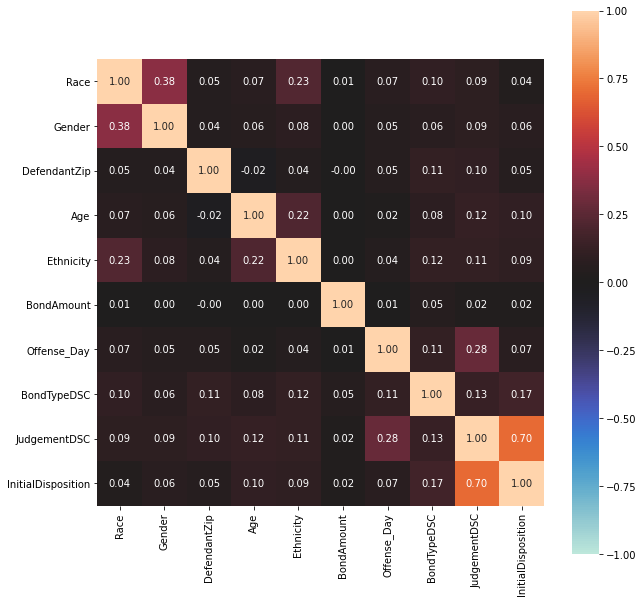

In [44]:
categorical_correlation= associations(control_ccd, filename= 'categorical_correlation.png', figsize=(10,10))